In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# File to Load 
file = "methane_hist_emissions.csv"
methane_emissions = pd.read_csv(file, index_col=0)

In [3]:
methane_emissions.head()

,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,827.98,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,824.27,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,677.00,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [4]:
# Check unique values in Unit column
methane_emissions['Unit'].unique()

array(['MTCO2e'], dtype=object)

In [5]:
# Drop unused columns
methane_emissions_df = methane_emissions.drop(columns=["Gas", "Unit"], axis =1)
methane_emissions_df.head()

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Oxana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
# GDP data to Load 
file = "World GDP Data.xls"
GDP = pd.read_excel(file, index_col=0)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [8]:
# Drop unused GDP columns
GDP_df = GDP.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "2019", "2020"])
GDP_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09
Africa Eastern and Southern,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,2.822135e+11,2.658377e+11,2.621972e+11,...,7.125580e+11,8.474095e+11,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Africa Western and Central,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375202e+11,...,5.069964e+11,5.915830e+11,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09
"Yemen, Rep.",5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,7.641103e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [9]:
# Find data types
GDP_df.dtypes

1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

In [10]:
# Explore null GDP values
GDP_df.isnull().sum()

1990    41
1991    46
1992    42
1993    39
1994    35
1995    26
1996    26
1997    26
1998    24
1999    23
2000    19
2001    18
2002    13
2003    13
2004    13
2005    13
2006    12
2007    12
2008    11
2009    11
2010    10
2011     8
2012     9
2013     8
2014     8
2015     9
2016    10
2017    10
2018    10
dtype: int64

In [11]:
# Explore null emissions values
methane_emissions_df.isnull().sum()

Sector    0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
1995      0
1994      0
1993      0
1992      0
1991      0
1990      9
dtype: int64

In [12]:
# Find data types
methane_emissions_df.dtypes

Sector     object
2018      float64
2017      float64
2016      float64
2015      float64
2014      float64
2013      float64
2012      float64
2011      float64
2010      float64
2009      float64
2008      float64
2007      float64
2006      float64
2005      float64
2004      float64
2003      float64
2002      float64
2001      float64
2000      float64
1999      float64
1998      float64
1997      float64
1996      float64
1995      float64
1994      float64
1993      float64
1992      float64
1991      float64
1990      float64
dtype: object

In [13]:
# Binary encoding Sector column
methane_emissions_encoded = pd.get_dummies(methane_emissions_df, columns=["Sector"])
methane_emissions_encoded.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1990,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
Country,,,,,,,,,,,,,,,,,,,,,
China,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,...,730.78,0,0,0,0,0,0,0,1,0
China,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,...,730.34,0,0,0,0,0,0,1,0,0
Russia,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,...,933.79,0,0,0,0,0,0,0,1,0
Russia,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,...,929.97,0,0,0,0,0,0,1,0,0
China,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,...,216.60,0,1,0,0,0,0,0,0,0


In [20]:
# set up our target variable and features
y = methane_emissions_encoded["2018"]
X = methane_emissions_encoded.drop(columns=["2018", "1990"], axis=1)

In [21]:
# # Split our dataset into training and testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train.shape

In [22]:
# Initiate linear model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [24]:
# Prediction
y_pred = regr.predict(X)
print(y_pred.shape)

(1738,)


ValueError: x and y must be the same size

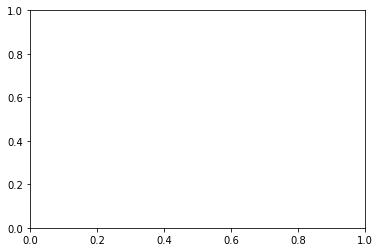

In [25]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [27]:
# 
print(regr.coef_)
print(regr.intercept_)

[ 1.18794997  0.15156301 -0.58685153  0.44321145 -0.11519002 -0.10826212
 -0.01049674 -0.07939384  0.17875774 -0.02351273 -0.13250501  0.29020072
 -0.16738964 -0.01998669  0.0242833  -0.14661462  0.16125972 -0.09965667
 -0.03045908 -0.04123168  0.19606725 -0.00841974 -0.07520677  0.00466013
 -0.04461997  0.13192169 -0.07903851 -0.00428699 -0.02886697 -0.03537875
 -0.01686207 -0.02112922 -0.00582092  0.04012848  0.03798788  0.03422855]
0.018781979755626566
